In [ ]:
# STEP 1: Setup Kaggle credentials
import os
os.environ['KAGGLE_USERNAME'] = "rahulrai5"
os.environ['KAGGLE_KEY'] = "d1680aeac1183251426f1a14eb548e69"

# STEP 2: Download the dataset
!kaggle datasets download -d grassknoted/asl-alphabet

# STEP 3: Unzip it
!unzip asl-alphabet.zip -d /content/asl_data

Streaming output truncated to the last 5000 lines.
  inflating: /content/asl_data/asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: /content/asl_data/asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: /content/asl_data/asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: /content/asl_data/asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: /content/asl_data/asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: /content/asl_data/asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: /content/asl_data/asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: /content/asl_data/asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: /content/asl_data/asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: /content/asl_data/asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  

In [ ]:
import cv2
import numpy as np
import os
import tensorflow as tf

IMG_SIZE = 64
# data_dir = "/content/asl_data/asl_alphabet_train" # Original incorrect path
data_dir = "/content/asl_data/asl_alphabet_train/asl_alphabet_train" # Corrected path
categories = sorted(os.listdir(data_dir))
print("Total classes:", len(categories), categories)

data = []
labels = []

for idx, category in enumerate(categories):
    folder_path = os.path.join(data_dir, category)
    for i, img_name in enumerate(os.listdir(folder_path)):
        if i >= 300:  # Limit to 300 images per class (optional for speed)
            break
        img_path = os.path.join(folder_path, img_name)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            data.append(img)
            labels.append(idx)
        except:
            continue

X = np.array(data) / 255.0
y = tf.keras.utils.to_categorical(labels)

Total classes: 29 ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (6960, 64, 64, 3), Test shape: (1740, 64, 64, 3)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(29, activation='softmax')  # 29 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 29)             │         7,453 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,605 (4.89 MB)

 Trainable params: 1,280,605 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop]
)

Epoch 1/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 50s 544ms/step - accuracy: 0.0484 - loss: 3.3398 - val_accuracy: 0.2277 - val_loss: 2.7658
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 87s 601ms/step - accuracy: 0.2571 - loss: 2.5952 - val_accuracy: 0.4914 - val_loss: 1.7175
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 71s 465ms/step - accuracy: 0.4697 - loss: 1.7299 - val_accuracy: 0.6193 - val_loss: 1.2857
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 45s 510ms/step - accuracy: 0.5987 - loss: 1.2731 - val_accuracy: 0.7356 - val_loss: 0.8939
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 82s 514ms/step - accuracy: 0.6872 - loss: 0.9526 - val_accuracy: 0.7838 - val_loss: 0.7571
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 79s 486ms/step - accuracy: 0.7407 - loss: 0.7884 - val_accuracy: 0.7823 - val_loss: 0.6651
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 79s 451ms/step - accuracy: 0.7948 - loss: 0.6392 - val_accuracy: 0.8297 - val_loss: 0.5522
Epoch 8/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 41s 451ms/step - accuracy: 0.8453 - loss: 0.4610 - val_accu

55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.9357 - loss: 0.2226

Test Accuracy: 93.10%


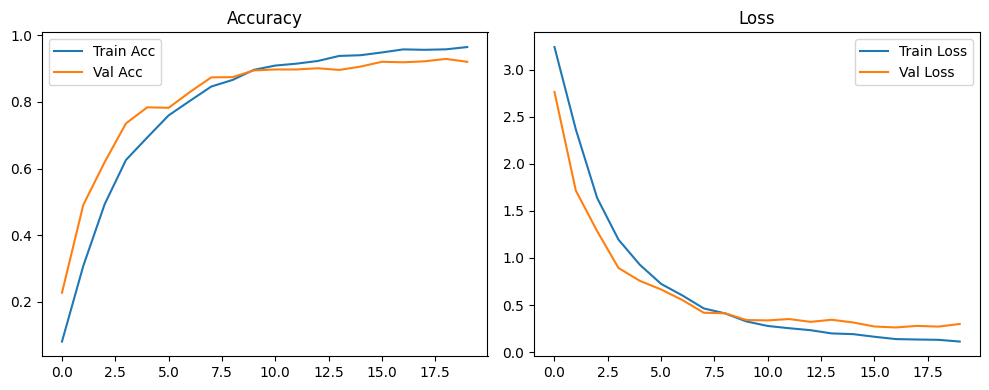

In [ ]:
# Final accuracy
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
model.save("asl_classifier_model.h5")

55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step
              precision    recall  f1-score   support

           A       0.92      0.93      0.93        60
           B       0.88      0.93      0.90        60
           C       0.95      0.95      0.95        60
           D       0.98      0.97      0.97        60
           E       0.87      0.87      0.87        60
           F       1.00      0.98      0.99        60
           G       0.85      0.93      0.89        60
           H       0.91      0.83      0.87        60
           I       1.00      0.98      0.99        60
           J       1.00      0.93      0.97        60
           K       0.94      0.98      0.96        60
           L       0.97      0.98      0.98        60
           M       0.88      0.85      0.86        60
           N       0.90      0.93      0.92        60
           O       0.92      0.95      0.93        60
           P       0.95      0.93      0.94        60
           Q       0.97      0.97      0.

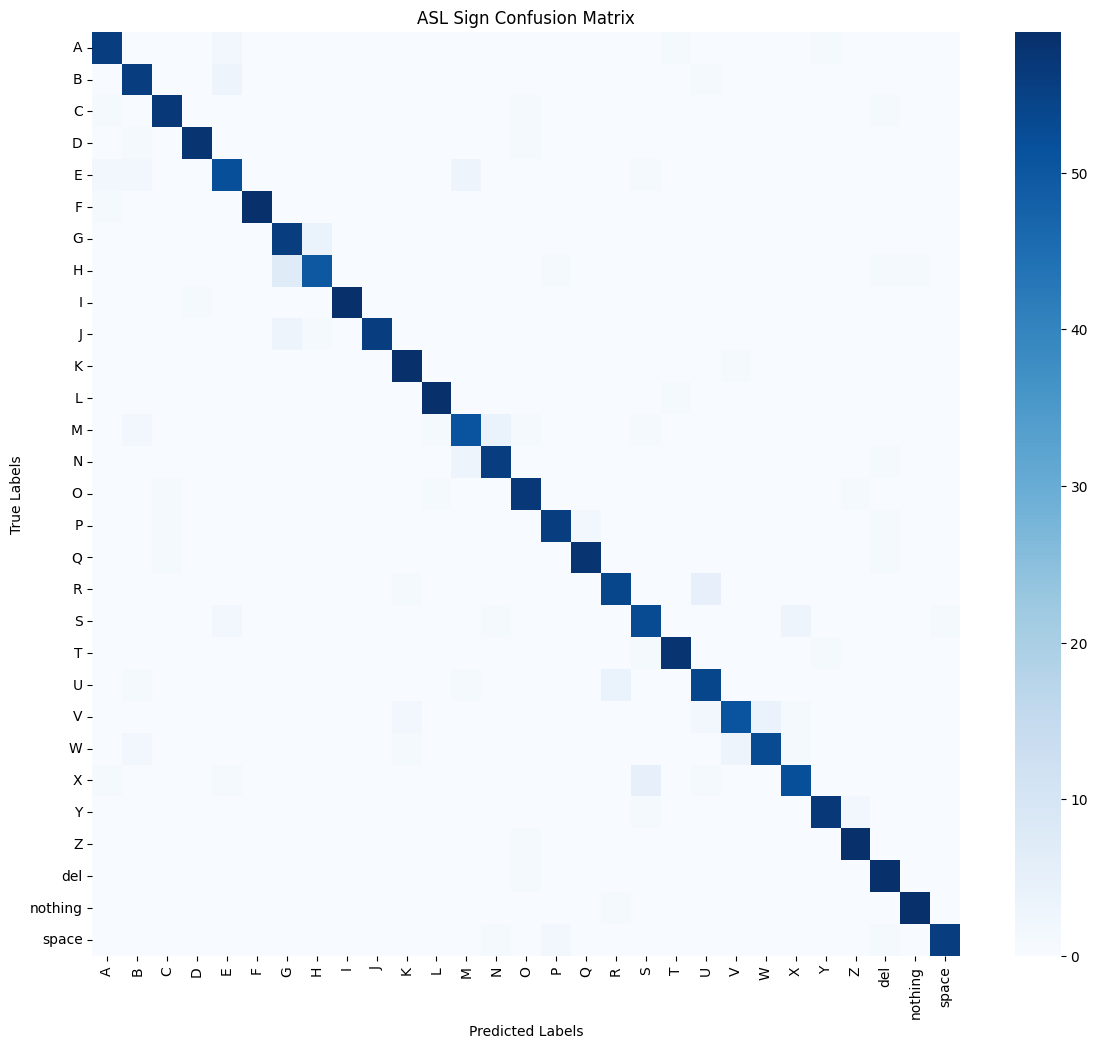

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report
print(classification_report(y_true, y_pred, target_names=categories))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues',
            xticklabels=categories,
            yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('ASL Sign Confusion Matrix')
plt.show()

In [ ]:
import os

test_folder = "/content/asl_data/asl_alphabet_test"
print("Files in test folder:", os.listdir(test_folder))

Files in test folder: ['asl_alphabet_test']


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd

test_folder = "/content/asl_data/asl_alphabet_test"
IMG_SIZE = 64

file_names = []
predictions = []

# Loop through all class folders
for class_folder in sorted(os.listdir(test_folder)):
    class_path = os.path.join(test_folder, class_folder)

    # Skip if not a folder
    if not os.path.isdir(class_path):
        continue

    for file in os.listdir(class_path):
        img_path = os.path.join(class_path, file)

        # Skip non-image files
        if not (img_path.endswith('.jpg') or img_path.endswith('.png')):
            continue

        img = cv2.imread(img_path)
        if img is None:
            print(f"⚠️ Skipped unreadable image: {img_path}")
            continue

        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0
        img = img.reshape(1, IMG_SIZE, IMG_SIZE, 3)

        pred = model.predict(img)
        predicted_class = categories[np.argmax(pred)]

        file_names.append(f"{class_folder}/{file}")
        predictions.append(predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━

In [ ]:
results_df = pd.DataFrame({
    'image_name': file_names,
    'predicted_label': predictions
})

results_df.to_csv('/content/asl_test_predictions.csv', index=False)
print("✅ Saved predictions:", results_df.shape)
results_df.head()

✅ Saved predictions: (28, 2)


,image_name,predicted_label
0,asl_alphabet_test/Y_test.jpg,Y
1,asl_alphabet_test/P_test.jpg,P
2,asl_alphabet_test/D_test.jpg,D
3,asl_alphabet_test/W_test.jpg,W
4,asl_alphabet_test/G_test.jpg,G


In [ ]:
from google.colab import files
files.download("/content/asl_test_predictions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>